In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, models, layers
from sklearn.metrics import classification_report

In [3]:
import os

In [4]:
(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()

In [5]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

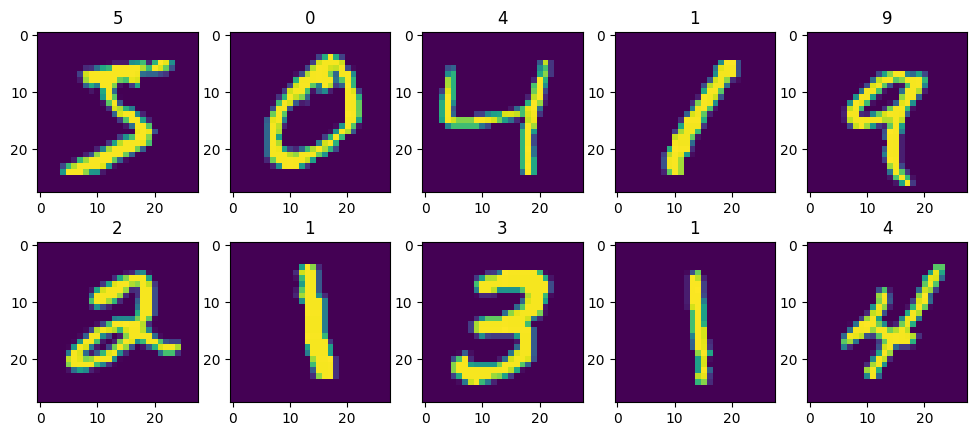

In [8]:
plt.figure(figsize=(12,5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(x_train[i])
    plt.title(y_train[i])

In [9]:
x_train = x_train/255.0
x_test = x_test/255.0

In [28]:
def plotting(accuracy, loss, val_accuracy, val_loss, epochs):
    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,4))
    ax1.plot(epochs, accuracy,'y', label='Training Accuracy')
    ax1.plot(epochs, val_accuracy,'r', label='Validation Accuracy')
    ax1.set_xlabel("Epochs")
    ax1.set_ylabel("Accuracy")
    ax1.set_title("Accuracy Plot")
    ax1.legend()

    ax2.plot(epochs, loss,'y', label='Training Loss')
    ax2.plot(epochs, val_loss,'r', label='Validation Loss')
    ax2.set_xlabel("Epochs")
    ax2.set_ylabel("Loss")
    ax2.set_title("Loss Plot")
    ax2.legend()

    plt.show()

In [11]:
img_model = models.Sequential([
    layers.Conv2D(128, (6,6), activation='relu', input_shape=(28,28,1)),
    layers.Dropout(0.25),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(256, (4,4), activation='relu'),
    layers.Dropout(0.25),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(256, (4,4), activation='relu'),
        
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.25),
    layers.Dense(10, activation='softmax')
])

C:\Users\SHREYAS\anaconda3\lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [12]:
img_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [13]:
history = img_model.fit(x_train, y_train, validation_split=0.2, batch_size=64, epochs=5)

Epoch 1/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 127s 167ms/step - accuracy: 0.8582 - loss: 0.4295 - val_accuracy: 0.9781 - val_loss: 0.0785
Epoch 2/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 132s 176ms/step - accuracy: 0.9824 - loss: 0.0656 - val_accuracy: 0.9868 - val_loss: 0.0555
Epoch 3/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 131s 174ms/step - accuracy: 0.9880 - loss: 0.0445 - val_accuracy: 0.9891 - val_loss: 0.0433
Epoch 4/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 118s 158ms/step - accuracy: 0.9908 - loss: 0.0340 - val_accuracy: 0.9910 - val_loss: 0.0369
Epoch 5/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 118s 158ms/step - accuracy: 0.9931 - loss: 0.0251 - val_accuracy: 0.9904 - val_loss: 0.0401


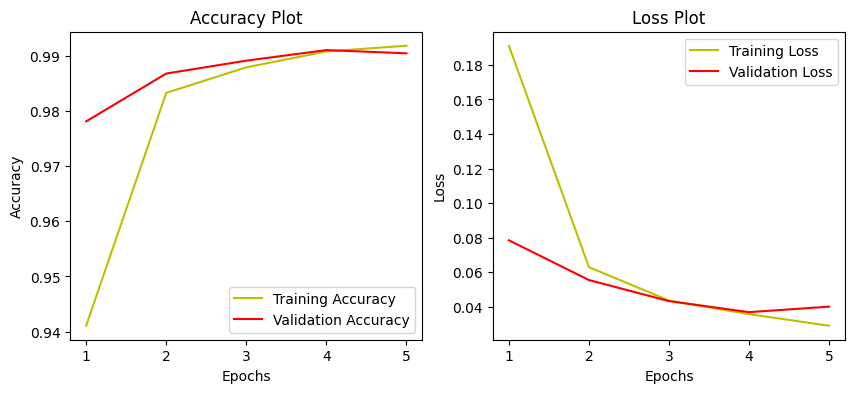

In [29]:
plotting(history.history['accuracy'], history.history['loss'], history.history['val_accuracy'], history.history['val_loss'], range(1, len(history.history['accuracy'])+1))

In [33]:
loss, accuracy = img_model.evaluate(x_test, y_test)
print(f"Accuracy: {accuracy*100:.2f}%")
print(f"Loss: {loss*100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step - accuracy: 0.9884 - loss: 0.0443
Accuracy: 99.08%
Loss: 3.60%


In [34]:
prob = img_model.predict(x_test)
prob_class = [np.argmax(i) for i in prob]
print(classification_report(y_test, prob_class))

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       980
           1       0.99      1.00      1.00      1135
           2       0.99      1.00      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.97      1.00      0.99       892
           6       1.00      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.98      0.99       974
           9       0.99      0.97      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [35]:
img_model.save('MNIST.h5')

In [36]:
model = models.load_model('MNIST.h5')

In [37]:
def detect():
    path = str(input("Enter path: "))
    img = tf.io.read_file(path)
    img = tf.image.decode_jpeg(img, channels = 1)
    plt.imshow(img)
    img = tf.image.resize(img, [28,28])
    img = img/255.0
    img = tf.expand_dims(img, axis = 0)
    probability = model.predict(img)
    max_index = np.argmax(probability)
    print(f"Detected character: {max_index}")

Enter path:  8.jpg


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Detected character: 8


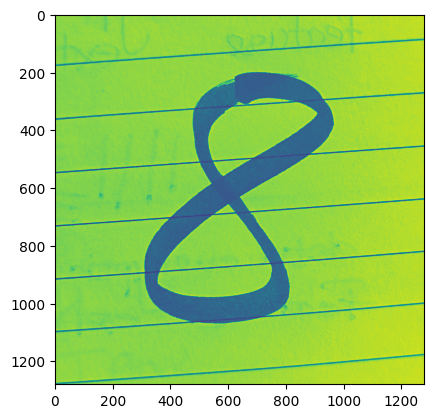

In [47]:
detect()

Enter path:  5.jpg


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Detected character: 5


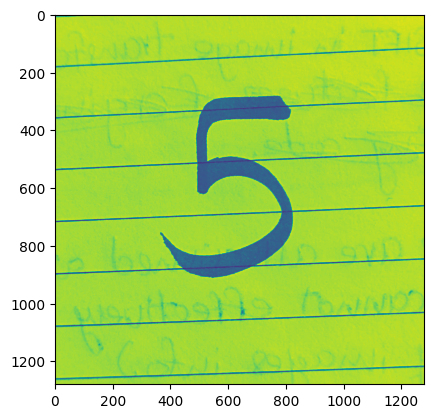

In [45]:
detect()